In [10]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [11]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [12]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [13]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [14]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

606

In [15]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [16]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [17]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [18]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | bluff
Processing Record 2 of Set 1 | mamallapuram
Processing Record 3 of Set 1 | vaini
Processing Record 4 of Set 1 | pemangkat
Processing Record 5 of Set 1 | kaitangata
Processing Record 6 of Set 1 | ushuaia
Processing Record 7 of Set 1 | punta arenas
Processing Record 8 of Set 1 | rikitea
Processing Record 9 of Set 1 | vila velha
Processing Record 10 of Set 1 | belize
Processing Record 11 of Set 1 | nizhneyansk
City not found. Skipping...
Processing Record 12 of Set 1 | busselton
Processing Record 13 of Set 1 | salalah
Processing Record 14 of Set 1 | birnin kebbi
Processing Record 15 of Set 1 | tsihombe
City not found. Skipping...
Processing Record 16 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 17 of Set 1 | weyburn
Processing Record 18 of Set 1 | hermanus
Processing Record 19 of Set 1 | grand river south east
City not found. Skipping...
Processing Record 20 of Set 1 | tu

Processing Record 39 of Set 4 | ewa beach
Processing Record 40 of Set 4 | nilagiri
Processing Record 41 of Set 4 | jamestown
Processing Record 42 of Set 4 | sao joao da barra
Processing Record 43 of Set 4 | ramanuj ganj
Processing Record 44 of Set 4 | shikhany
Processing Record 45 of Set 4 | ancud
Processing Record 46 of Set 4 | takoradi
Processing Record 47 of Set 4 | francisco sa
Processing Record 48 of Set 4 | humaita
Processing Record 49 of Set 4 | narsaq
Processing Record 50 of Set 4 | hami
Processing Record 1 of Set 5 | lixourion
Processing Record 2 of Set 5 | zhengjiatun
Processing Record 3 of Set 5 | torrington
Processing Record 4 of Set 5 | atar
Processing Record 5 of Set 5 | erdaojiang
Processing Record 6 of Set 5 | daman
Processing Record 7 of Set 5 | hamilton
Processing Record 8 of Set 5 | dudinka
Processing Record 9 of Set 5 | thompson
Processing Record 10 of Set 5 | shingu
Processing Record 11 of Set 5 | qaanaaq
Processing Record 12 of Set 5 | bambous virieux
Processing R

Processing Record 29 of Set 8 | nargana
Processing Record 30 of Set 8 | dunedin
Processing Record 31 of Set 8 | tibati
Processing Record 32 of Set 8 | inuvik
Processing Record 33 of Set 8 | domoni
Processing Record 34 of Set 8 | vasudevanallur
Processing Record 35 of Set 8 | dandong
Processing Record 36 of Set 8 | balabac
Processing Record 37 of Set 8 | prince albert
Processing Record 38 of Set 8 | vao
Processing Record 39 of Set 8 | lyuban
Processing Record 40 of Set 8 | roald
Processing Record 41 of Set 8 | pyu
Processing Record 42 of Set 8 | gazojak
Processing Record 43 of Set 8 | sarahan
Processing Record 44 of Set 8 | kiama
Processing Record 45 of Set 8 | kununurra
Processing Record 46 of Set 8 | kisangani
Processing Record 47 of Set 8 | doka
Processing Record 48 of Set 8 | beringovskiy
Processing Record 49 of Set 8 | dzerzhinskoye
Processing Record 50 of Set 8 | farafangana
Processing Record 1 of Set 9 | tres lagoas
Processing Record 2 of Set 9 | mayumba
Processing Record 3 of Se

Processing Record 23 of Set 12 | saint-leu
Processing Record 24 of Set 12 | mopipi
Processing Record 25 of Set 12 | tommot
Processing Record 26 of Set 12 | aflu
City not found. Skipping...
Processing Record 27 of Set 12 | opuwo
Processing Record 28 of Set 12 | norsup
Processing Record 29 of Set 12 | lac du bonnet
Processing Record 30 of Set 12 | pozo colorado
Processing Record 31 of Set 12 | mkushi
Processing Record 32 of Set 12 | buckeye
Processing Record 33 of Set 12 | cumaribo
City not found. Skipping...
Processing Record 34 of Set 12 | decatur
Processing Record 35 of Set 12 | san cristobal
Processing Record 36 of Set 12 | caravelas
Processing Record 37 of Set 12 | bom jesus
Processing Record 38 of Set 12 | puerto el triunfo
Processing Record 39 of Set 12 | bahia blanca
Processing Record 40 of Set 12 | kongwa
Processing Record 41 of Set 12 | aryanah
Processing Record 42 of Set 12 | swakopmund
Processing Record 43 of Set 12 | borujerd
Processing Record 44 of Set 12 | esso
Processing 

In [19]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Bluff,-46.60,168.33,63.00,48,50,5.01,NZ,2020-12-01 03:53:55
1,Mamallapuram,12.63,80.17,80.60,83,75,5.82,IN,2020-12-01 03:53:55
2,Vaini,-21.20,-175.20,82.40,69,20,6.93,TO,2020-12-01 03:53:55
3,Pemangkat,1.17,108.97,84.16,67,91,4.63,ID,2020-12-01 03:50:47
4,Kaitangata,-46.28,169.85,57.00,58,25,8.99,NZ,2020-12-01 03:53:55
5,Ushuaia,-54.80,-68.30,42.80,81,75,20.80,AR,2020-12-01 03:53:55
6,Punta Arenas,-53.15,-70.92,44.60,81,90,18.34,CL,2020-12-01 03:53:55
7,Rikitea,-23.12,-134.97,75.88,75,39,9.26,PF,2020-12-01 03:53:55
8,Vila Velha,-20.33,-40.29,75.20,83,0,8.05,BR,2020-12-01 03:53:55
9,Belize,17.25,-88.75,73.00,79,2,3.62,BZ,2020-12-01 03:53:56


In [20]:
new_column_order = ['City', 'Country', 'Date', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed']
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Bluff,NZ,2020-12-01 03:53:55,-46.60,168.33,63.00,48,50,5.01
1,Mamallapuram,IN,2020-12-01 03:53:55,12.63,80.17,80.60,83,75,5.82
2,Vaini,TO,2020-12-01 03:53:55,-21.20,-175.20,82.40,69,20,6.93
3,Pemangkat,ID,2020-12-01 03:50:47,1.17,108.97,84.16,67,91,4.63
4,Kaitangata,NZ,2020-12-01 03:53:55,-46.28,169.85,57.00,58,25,8.99
5,Ushuaia,AR,2020-12-01 03:53:55,-54.80,-68.30,42.80,81,75,20.80
6,Punta Arenas,CL,2020-12-01 03:53:55,-53.15,-70.92,44.60,81,90,18.34
7,Rikitea,PF,2020-12-01 03:53:55,-23.12,-134.97,75.88,75,39,9.26
8,Vila Velha,BR,2020-12-01 03:53:55,-20.33,-40.29,75.20,83,0,8.05
9,Belize,BZ,2020-12-01 03:53:56,17.25,-88.75,73.00,79,2,3.62


In [23]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"

# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [24]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

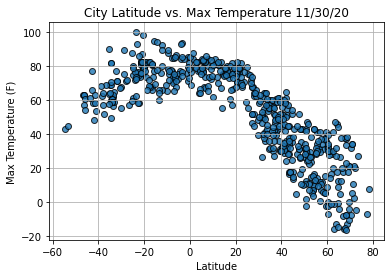

In [25]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

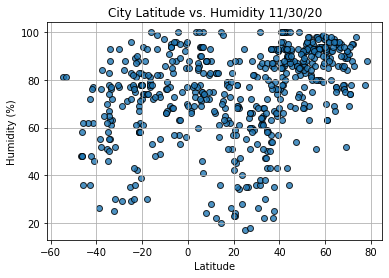

In [26]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.

plt.show()

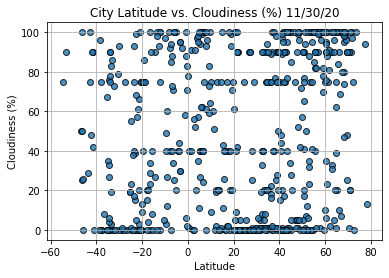

In [27]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")

# Show plot.
plt.show()

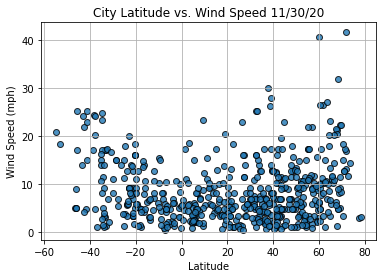

In [28]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig4.png")

# Show plot.
plt.show()


In [29]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [30]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

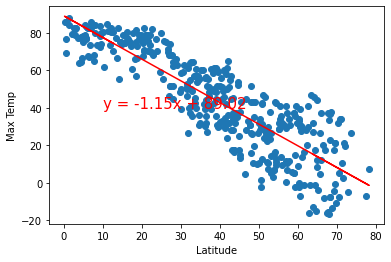

In [31]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

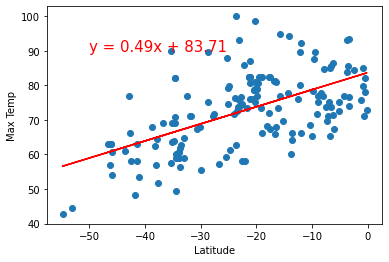

In [32]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))


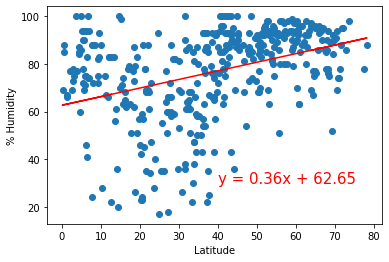

In [33]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,30))

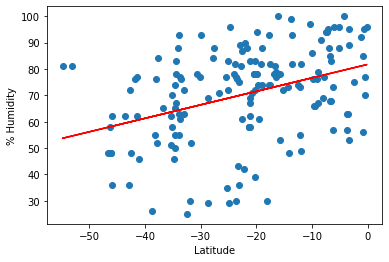

In [34]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

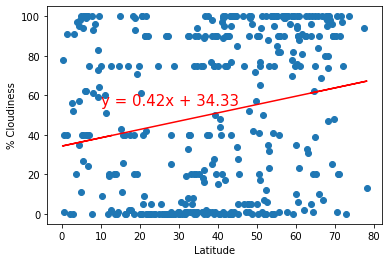

In [35]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]

# Call the function
plot_linear_regression(x_values, y_values,
                   'Linear Regression on the Northern Hemisphere \
                    for % Cloudiness', '% Cloudiness',(10,55))

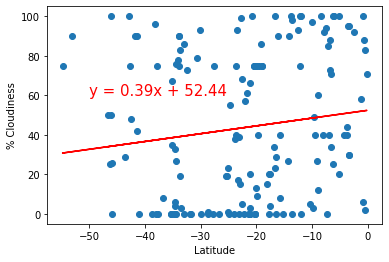

In [36]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

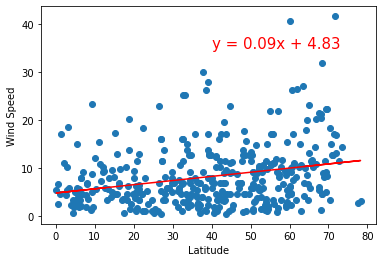

In [37]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]

# Call the function
plot_linear_regression(x_values, y_values,
                   'Linear Regression on the Northern Hemisphere \
                    for Wind Speed', 'Wind Speed',(40,35))

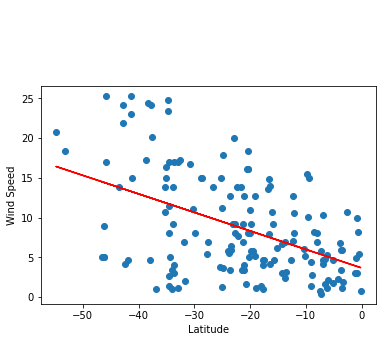

In [38]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))
